In [1]:
print("hello")

hello


In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import random
from tqdm.notebook import tqdm
warnings.filterwarnings('ignore')
%matplotlib inline

In [12]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

In [13]:
from tensorflow.keras.preprocessing.image import load_img


In [14]:
TRAIN_DIR = 'C:/Users/Manish Karki/Downloads/archive/images/train/'
TEST_DIR = 'C:/Users/Manish Karki/Downloads/archive/images/validation/'

In [15]:
def load_dataset(directory):
    image_paths = []
    labels = []
    
    for label in os.listdir(directory):
        for filename in os.listdir(directory+label):
            image_path = os.path.join(directory, label, filename)
            image_paths.append(image_path)
            labels.append(label)
            
        print(label, "Completed")
        
    return image_paths, labels

In [16]:
## convert into dataframe
train = pd.DataFrame()
train['image'], train['label'] = load_dataset(TRAIN_DIR)
# shuffle the dataset
train = train.sample(frac=1).reset_index(drop=True)
train.head()

angry Completed
disgust Completed
fear Completed
happy Completed
neutral Completed
sad Completed
surprise Completed


,image,label
0,C:/Users/Manish Karki/Downloads/archive/images...,neutral
1,C:/Users/Manish Karki/Downloads/archive/images...,neutral
2,C:/Users/Manish Karki/Downloads/archive/images...,surprise
3,C:/Users/Manish Karki/Downloads/archive/images...,happy
4,C:/Users/Manish Karki/Downloads/archive/images...,disgust


In [17]:
test = pd.DataFrame()
test['image'], test['label'] = load_dataset(TEST_DIR)
test.head()

angry Completed
disgust Completed
fear Completed
happy Completed
neutral Completed
sad Completed
surprise Completed


,image,label
0,C:/Users/Manish Karki/Downloads/archive/images...,angry
1,C:/Users/Manish Karki/Downloads/archive/images...,angry
2,C:/Users/Manish Karki/Downloads/archive/images...,angry
3,C:/Users/Manish Karki/Downloads/archive/images...,angry
4,C:/Users/Manish Karki/Downloads/archive/images...,angry


# no changes made to the code from refrence code up to here

# made extract feature which is different from the the refrence code

In [18]:
def extract_features(images):
    # Create an empty array to hold the features
    features = np.empty((len(images), 48, 48, 1))
    
    # Loop over the images and load each one into the array
    for i, image in enumerate(tqdm(images)):
        img = load_img(image, color_mode='grayscale')
        img = np.array(img)
        img = np.expand_dims(img, axis=-1)
        features[i] = img
    
    return features

In [19]:
train_features = extract_features(train['image'])

  0%|          | 0/28821 [00:00<?, ?it/s]

In [20]:
from tqdm.notebook import tqdm

In [21]:
test_features = extract_features(test['image'])

  0%|          | 0/7066 [00:00<?, ?it/s]

In [22]:
## normalize the image
x_train = train_features/255.0
x_test = test_features/255.0

In [23]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(train['label'])
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [24]:
y_train = to_categorical(y_train, num_classes=7)
y_test = to_categorical(y_test, num_classes=7)

In [25]:
# config
input_shape = (48, 48, 1)
output_class = 7

# This code below is the Reference code I ran it to compare it with my own modified code

In [26]:
model = Sequential()
# convolutional layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(output_class, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics='accuracy')

In [27]:
history = model.fit(x=x_train, y=y_train, batch_size=128, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
226/226 [==============================] - 264s 1s/step - loss: 1.8236 - accuracy: 0.2432 - val_loss: 1.8094 - val_accuracy: 0.2583
Epoch 2/10
226/226 [==============================] - 253s 1s/step - loss: 1.8032 - accuracy: 0.2507 - val_loss: 1.7987 - val_accuracy: 0.2303
Epoch 3/10
226/226 [==============================] - 252s 1s/step - loss: 1.7268 - accuracy: 0.2908 - val_loss: 1.6267 - val_accuracy: 0.3375
Epoch 4/10
226/226 [==============================] - 253s 1s/step - loss: 1.6089 - accuracy: 0.3645 - val_loss: 1.4955 - val_accuracy: 0.4247
Epoch 5/10
226/226 [==============================] - 255s 1s/step - loss: 1.5025 - accuracy: 0.4147 - val_loss: 1.4164 - val_accuracy: 0.4530
Epoch 6/10
226/226 [==============================] - 266s 1s/step - loss: 1.4485 - accuracy: 0.4419 - val_loss: 1.3190 - val_accuracy: 0.5037
Epoch 7/10
226/226 [==============================] - 280s 1s/step - loss: 1.3922 - accuracy: 0.4646 - val_loss: 1.3474 - val_accuracy: 0.4825

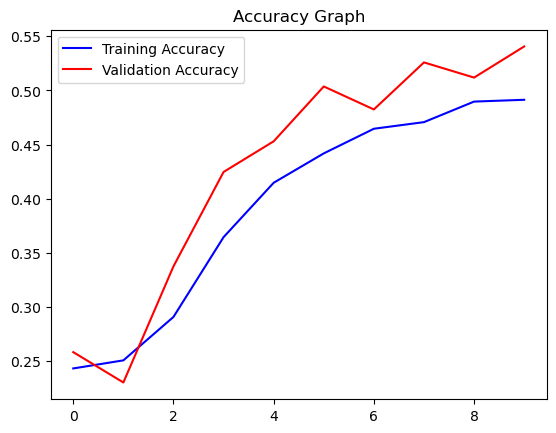

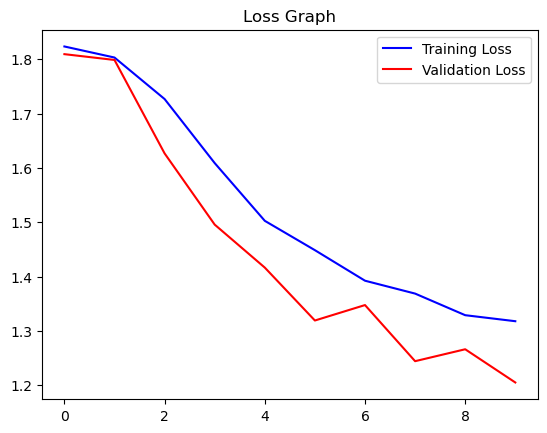

In [28]:
# Similar to refrence but made changes in the next module

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()

plt.show()



# Change 1:       my code: changes made 1) added padding, 2) added Batchnormalization 3) Epoch size changed to 10 4) changed Dropout rate for the last fully connected layer to 0.3

In [29]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization

model = Sequential()

# Convolutional layers
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same', input_shape=input_shape))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

# Flatten
model.add(Flatten())

# Fully connected layers
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Output layer
model.add(Dense(output_class, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics='accuracy')


In [30]:
history = model.fit(x=x_train, y=y_train, batch_size=128, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
226/226 [==============================] - 481s 2s/step - loss: 2.1100 - accuracy: 0.2244 - val_loss: 1.8733 - val_accuracy: 0.2581
Epoch 2/10
226/226 [==============================] - 462s 2s/step - loss: 1.7373 - accuracy: 0.3294 - val_loss: 2.6760 - val_accuracy: 0.2665
Epoch 3/10
226/226 [==============================] - 452s 2s/step - loss: 1.4990 - accuracy: 0.4241 - val_loss: 1.6662 - val_accuracy: 0.4002
Epoch 4/10
226/226 [==============================] - 450s 2s/step - loss: 1.3484 - accuracy: 0.4817 - val_loss: 1.3650 - val_accuracy: 0.4740
Epoch 5/10
226/226 [==============================] - 543s 2s/step - loss: 1.2479 - accuracy: 0.5225 - val_loss: 1.2233 - val_accuracy: 0.5379
Epoch 6/10
226/226 [==============================] - 548s 2s/step - loss: 1.1930 - accuracy: 0.5460 - val_loss: 1.5092 - val_accuracy: 0.4482
Epoch 7/10
226/226 [==============================] - 541s 2s/step - loss: 1.1514 - accuracy: 0.5618 - val_loss: 1.1655 - val_accuracy: 0.5600

# Made a plot_history function that takes the history object, the desired metric, y-axis label, and the title for the plot. Change from refrence code 

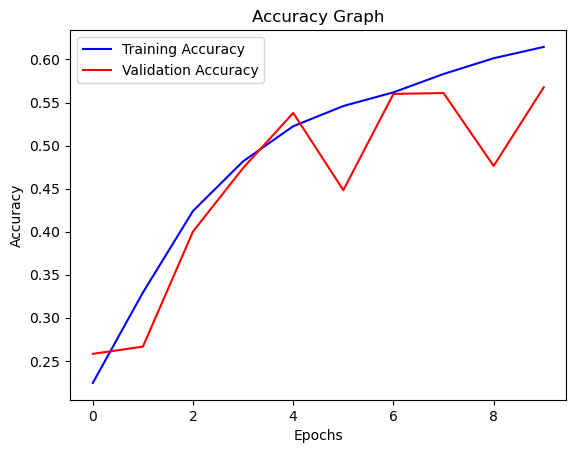

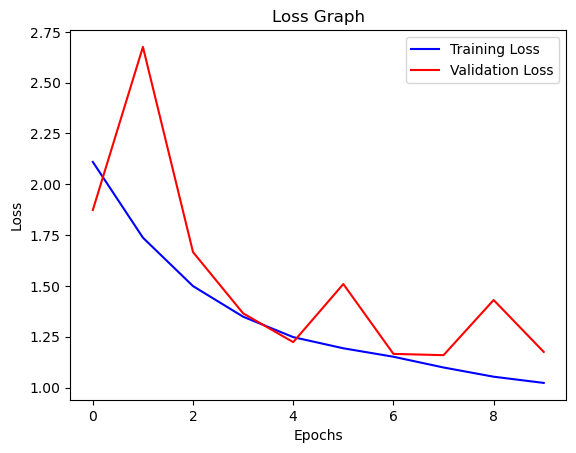

<Figure size 640x480 with 0 Axes>

In [31]:
import matplotlib.pyplot as plt

def plot_history(history, metric, ylabel, title):
    train_metric = history.history[metric]
    val_metric = history.history[f"val_{metric}"]
    epochs = range(len(train_metric))

    plt.plot(epochs, train_metric, 'b', label=f'Training {ylabel}')
    plt.plot(epochs, val_metric, 'r', label=f'Validation {ylabel}')
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel(ylabel)
    plt.legend()
    plt.figure()

plot_history(history, 'accuracy', 'Accuracy', 'Accuracy Graph')
plot_history(history, 'loss', 'Loss', 'Loss Graph')

plt.show()


# change 2:Changed the optimizer from adam to SGD

In [32]:

from keras.optimizers import SGD

model = Sequential()

# Convolutional layers
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same', input_shape=input_shape))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

# Flatten
model.add(Flatten())

# Fully connected layers
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Output layer
model.add(Dense(output_class, activation='softmax'))

# adjust the learning rate, momentum, and other parameters of the SGD optimizer
sgd_optimizer = SGD(learning_rate=0.01, momentum=0.9)

model.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy', metrics='accuracy')


In [33]:
history = model.fit(x=x_train, y=y_train, batch_size=128, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
226/226 [==============================] - 504s 2s/step - loss: 1.9916 - accuracy: 0.2344 - val_loss: 1.8424 - val_accuracy: 0.2590
Epoch 2/10
226/226 [==============================] - 499s 2s/step - loss: 1.7915 - accuracy: 0.2692 - val_loss: 1.7740 - val_accuracy: 0.2846
Epoch 3/10
226/226 [==============================] - 500s 2s/step - loss: 1.7593 - accuracy: 0.2925 - val_loss: 1.7277 - val_accuracy: 0.3058
Epoch 4/10
226/226 [==============================] - 452s 2s/step - loss: 1.7086 - accuracy: 0.3191 - val_loss: 1.6569 - val_accuracy: 0.3573
Epoch 5/10
226/226 [==============================] - 477s 2s/step - loss: 1.6542 - accuracy: 0.3514 - val_loss: 1.5908 - val_accuracy: 0.3769
Epoch 6/10
226/226 [==============================] - 542s 2s/step - loss: 1.5981 - accuracy: 0.3697 - val_loss: 1.5560 - val_accuracy: 0.3970
Epoch 7/10
226/226 [==============================] - 499s 2s/step - loss: 1.5518 - accuracy: 0.3927 - val_loss: 1.5175 - val_accuracy: 0.4053

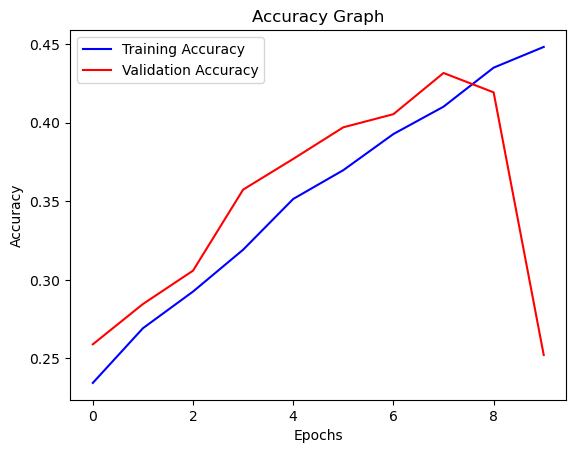

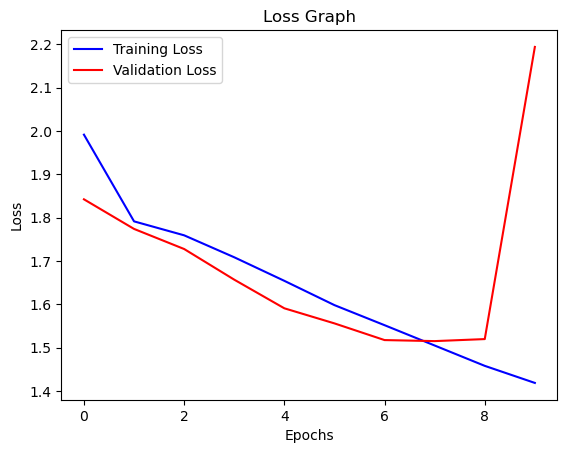

<Figure size 640x480 with 0 Axes>

In [35]:
import matplotlib.pyplot as plt

def plot_history(history, metric, ylabel, title):
    train_metric = history.history[metric]
    val_metric = history.history[f"val_{metric}"]
    epochs = range(len(train_metric))

    plt.plot(epochs, train_metric, 'b', label=f'Training {ylabel}')
    plt.plot(epochs, val_metric, 'r', label=f'Validation {ylabel}')
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel(ylabel)
    plt.legend()
    plt.figure()

plot_history(history, 'accuracy', 'Accuracy', 'Accuracy Graph')
plot_history(history, 'loss', 'Loss', 'Loss Graph')

plt.show()

# change 3:I added a convolution layer with 1024 filters, a kernel size of (3, 3), ReLU activation, and 'same' padding.

In [36]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization

model = Sequential()

# Convolutional layers
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same', input_shape=input_shape))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))
## m
# Additional convolution layer
model.add(Conv2D(1024, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

# Flatten
model.add(Flatten())

# Fully connected layers
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Output layer
model.add(Dense(output_class, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics='accuracy')


In [37]:
history = model.fit(x=x_train, y=y_train, batch_size=128, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
226/226 [==============================] - 646s 3s/step - loss: 2.1699 - accuracy: 0.2071 - val_loss: 1.8771 - val_accuracy: 0.2583
Epoch 2/10
226/226 [==============================] - 674s 3s/step - loss: 1.8216 - accuracy: 0.2761 - val_loss: 2.1209 - val_accuracy: 0.2583
Epoch 3/10
226/226 [==============================] - 699s 3s/step - loss: 1.5666 - accuracy: 0.3956 - val_loss: 2.4357 - val_accuracy: 0.2969
Epoch 4/10
226/226 [==============================] - 638s 3s/step - loss: 1.4114 - accuracy: 0.4547 - val_loss: 1.8483 - val_accuracy: 0.3605
Epoch 5/10
226/226 [==============================] - 621s 3s/step - loss: 1.3088 - accuracy: 0.4959 - val_loss: 1.6853 - val_accuracy: 0.4140
Epoch 6/10
226/226 [==============================] - 641s 3s/step - loss: 1.2412 - accuracy: 0.5270 - val_loss: 1.2455 - val_accuracy: 0.5215
Epoch 7/10
226/226 [==============================] - 588s 3s/step - loss: 1.1828 - accuracy: 0.5497 - val_loss: 1.1695 - val_accuracy: 0.5556

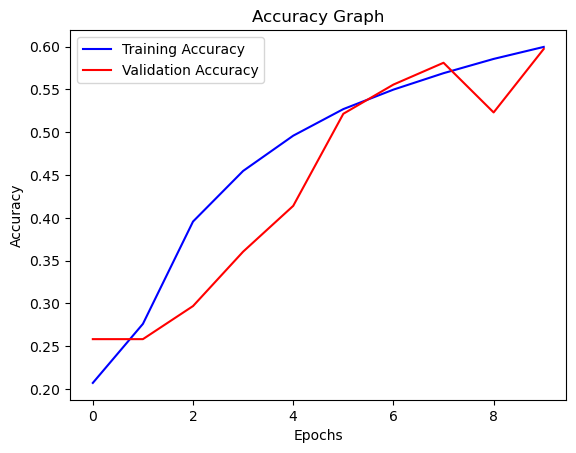

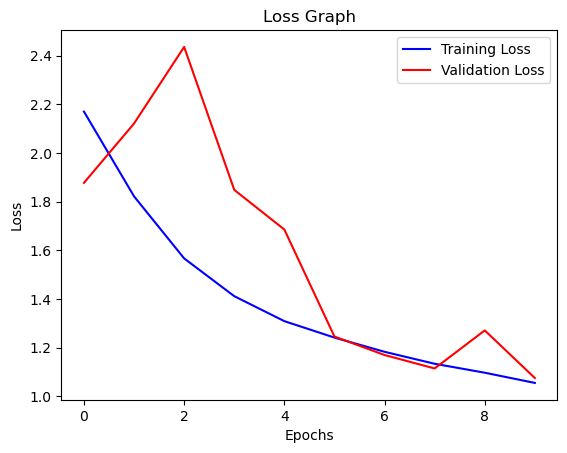

<Figure size 640x480 with 0 Axes>

In [38]:
import matplotlib.pyplot as plt

def plot_history(history, metric, ylabel, title):
    train_metric = history.history[metric]
    val_metric = history.history[f"val_{metric}"]
    epochs = range(len(train_metric))

    plt.plot(epochs, train_metric, 'b', label=f'Training {ylabel}')
    plt.plot(epochs, val_metric, 'r', label=f'Validation {ylabel}')
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel(ylabel)
    plt.legend()
    plt.figure()

plot_history(history, 'accuracy', 'Accuracy', 'Accuracy Graph')
plot_history(history, 'loss', 'Loss', 'Loss Graph')

plt.show()

# Change 4 batch size 64

In [39]:
history = model.fit(x=x_train, y=y_train, batch_size=64, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
451/451 [==============================] - 652s 1s/step - loss: 1.1216 - accuracy: 0.5771 - val_loss: 1.1481 - val_accuracy: 0.5706
Epoch 2/10
451/451 [==============================] - 753s 2s/step - loss: 1.0780 - accuracy: 0.5939 - val_loss: 1.4286 - val_accuracy: 0.4608
Epoch 3/10
451/451 [==============================] - 701s 2s/step - loss: 1.0295 - accuracy: 0.6133 - val_loss: 1.0692 - val_accuracy: 0.6018
Epoch 4/10
451/451 [==============================] - 708s 2s/step - loss: 0.9888 - accuracy: 0.6305 - val_loss: 1.1253 - val_accuracy: 0.5848
Epoch 5/10
451/451 [==============================] - 798s 2s/step - loss: 0.9556 - accuracy: 0.6466 - val_loss: 1.3825 - val_accuracy: 0.5570
Epoch 6/10
451/451 [==============================] - 761s 2s/step - loss: 0.9109 - accuracy: 0.6591 - val_loss: 1.0374 - val_accuracy: 0.6189
Epoch 7/10
451/451 [==============================] - 675s 1s/step - loss: 0.8619 - accuracy: 0.6787 - val_loss: 1.1168 - val_accuracy: 0.6097

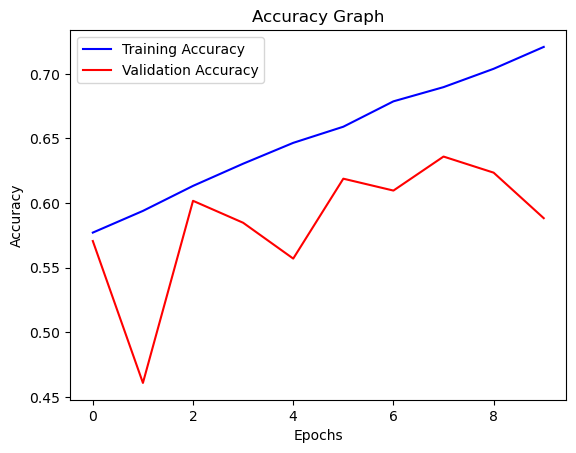

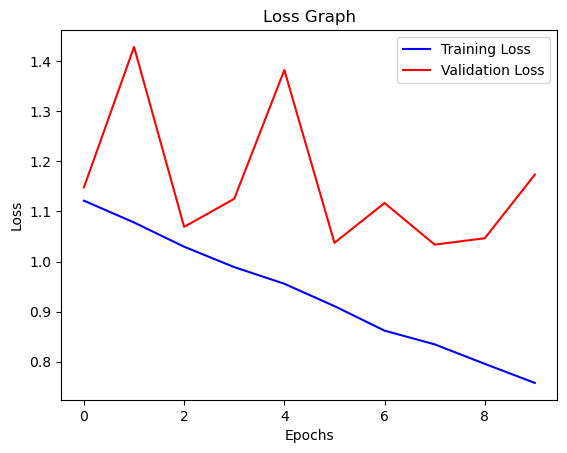

<Figure size 640x480 with 0 Axes>

In [40]:
import matplotlib.pyplot as plt

def plot_history(history, metric, ylabel, title):
    train_metric = history.history[metric]
    val_metric = history.history[f"val_{metric}"]
    epochs = range(len(train_metric))

    plt.plot(epochs, train_metric, 'b', label=f'Training {ylabel}')
    plt.plot(epochs, val_metric, 'r', label=f'Validation {ylabel}')
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel(ylabel)
    plt.legend()
    plt.figure()

plot_history(history, 'accuracy', 'Accuracy', 'Accuracy Graph')
plot_history(history, 'loss', 'Loss', 'Loss Graph')

plt.show()


In [41]:
history = model.fit(x=x_train, y=y_train, batch_size=64, epochs=20, validation_data=(x_test, y_test))

Epoch 1/20
451/451 [==============================] - 653s 1s/step - loss: 0.7212 - accuracy: 0.7353 - val_loss: 1.1075 - val_accuracy: 0.6240
Epoch 2/20
451/451 [==============================] - 671s 1s/step - loss: 0.6828 - accuracy: 0.7515 - val_loss: 1.0247 - val_accuracy: 0.6492
Epoch 3/20
451/451 [==============================] - 671s 1s/step - loss: 0.6586 - accuracy: 0.7589 - val_loss: 1.2432 - val_accuracy: 0.5893
Epoch 4/20
451/451 [==============================] - 645s 1s/step - loss: 0.6262 - accuracy: 0.7728 - val_loss: 1.0849 - val_accuracy: 0.6332
Epoch 5/20
451/451 [==============================] - 654s 1s/step - loss: 0.6000 - accuracy: 0.7815 - val_loss: 1.5480 - val_accuracy: 0.4982
Epoch 6/20
451/451 [==============================] - 618s 1s/step - loss: 0.5692 - accuracy: 0.7919 - val_loss: 1.1407 - val_accuracy: 0.6517
Epoch 7/20
451/451 [==============================] - 606s 1s/step - loss: 0.5422 - accuracy: 0.8026 - val_loss: 1.2021 - val_accuracy: 0.6194

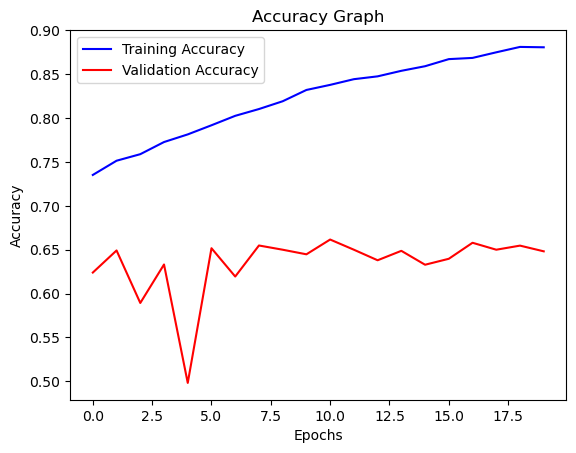

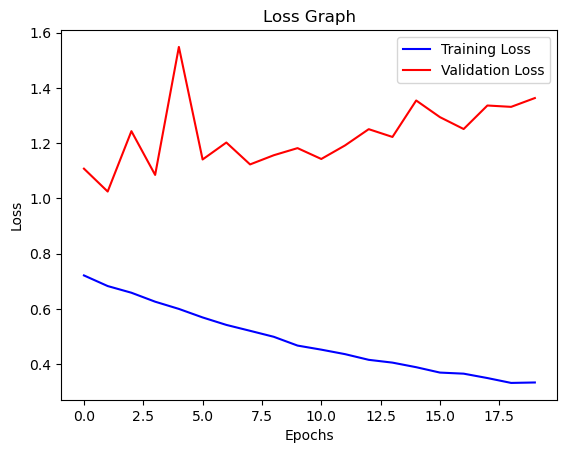

<Figure size 640x480 with 0 Axes>

In [42]:
import matplotlib.pyplot as plt

def plot_history(history, metric, ylabel, title):
    train_metric = history.history[metric]
    val_metric = history.history[f"val_{metric}"]
    epochs = range(len(train_metric))

    plt.plot(epochs, train_metric, 'b', label=f'Training {ylabel}')
    plt.plot(epochs, val_metric, 'r', label=f'Validation {ylabel}')
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel(ylabel)
    plt.legend()
    plt.figure()

plot_history(history, 'accuracy', 'Accuracy', 'Accuracy Graph')
plot_history(history, 'loss', 'Loss', 'Loss Graph')

plt.show()